In [1]:
import os
import math

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=1000)

rd_seed = 333

In [2]:
path_file = os.sep.join(['created_data', 'class_matrix_bak.csv'])
matrix = pd.read_csv(path_file, sep=",", index_col='studium_id') 

In [3]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5437 entries, 17929506 to 19350006
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-PA1    4948 non-null   float64
 1   BI-PAI    4207 non-null   float64
 2   BI-CAO    4608 non-null   float64
 3   BI-PS1    5031 non-null   float64
 4   BI-MLO    4126 non-null   float64
 5   BI-ZMA    4271 non-null   float64
 6   BI-PA2    2710 non-null   float64
 7   BI-DBS    2885 non-null   float64
 8   BI-SAP    2783 non-null   float64
 9   BI-LIN    2944 non-null   float64
 10  BI-AG1    2181 non-null   float64
 11  BI-AAG    2361 non-null   float64
 12  BI-ZDM    2272 non-null   float64
 13  BI-OSY    1489 non-null   float64
 14  BI-PSI    1653 non-null   float64
 15  BI-BEZ    1590 non-null   float64
 16  BI-PST    1377 non-null   float64
 17  BI-DPR    966 non-null    float64
 18  BI-SI1.2  1421 non-null   float64
 19  BI-EMP    1673 non-null   float64
dtypes: float64(20)
memo

In [4]:
matrix

,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,
17929506,1.5,2.0,1.5,2.0,2.0,2.5,4.0,2.0,4.0,3.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17931206,4.0,2.0,1.5,2.5,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15569706,3.0,1.5,1.5,2.0,1.5,1.5,2.0,1.0,1.0,2.0,2.0,1.5,2.0,1.0,2.0,1.5,4.0,4.0,1.5,4.0
16729706,NaN,NaN,NaN,NaN,2.0,2.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,1.5,NaN
17931606,1.5,1.0,1.0,1.5,2.5,2.5,2.0,1.5,1.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19351806,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19351406,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19351006,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Rozdělení předmětů

In [5]:
courses_cluster_1 = ['BI-CAO', 'BI-DPR', 'BI-EMP']
courses_cluster_2 = ['BI-MLO', 'BI-ZMA', 'BI-LIN', 'BI-ZDM', 'BI-PST']
courses_cluster_3 = ['BI-PA1', 'BI-PS1', 'BI-PA2', 'BI-AG1', 'BI-OSY']
courses_cluster_4 = ['BI-PAI', 'BI-DBS', 'BI-SAP', 'BI-AAG', 'BI-PSI', 'BI-BEZ', 'BI-SI1.2']

## Doplnění NaN hodnot

In [6]:
imp = KNNImputer(n_neighbors=5)
matrix = pd.DataFrame(imp.fit_transform(matrix), index=matrix.index, columns=matrix.columns)

In [7]:
matrix

,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,
17929506,1.5,2.0,1.5,2.0,2.0,2.5,4.0,2.0,4.0,3.0,4.0,4.0,4.0,3.6,3.4,2.3,4.0,4.0,2.7,3.2
17931206,4.0,2.0,1.5,2.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.1,3.2,2.8,3.7,3.4,2.8,2.2
15569706,3.0,1.5,1.5,2.0,1.5,1.5,2.0,1.0,1.0,2.0,2.0,1.5,2.0,1.0,2.0,1.5,4.0,4.0,1.5,4.0
16729706,4.0,2.7,1.8,3.2,2.0,2.0,4.0,3.5,4.0,4.0,4.0,4.0,4.0,3.4,3.5,2.6,3.7,3.8,1.5,2.8
17931606,1.5,1.0,1.0,1.5,2.5,2.5,2.0,1.5,1.0,4.0,4.0,4.0,4.0,2.6,2.9,2.9,3.8,3.8,2.7,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19351806,4.0,3.5,4.0,4.0,4.0,4.0,3.6,3.4,3.3,3.7,4.0,3.8,4.0,3.1,3.3,3.3,4.0,3.3,3.7,2.9
19351406,4.0,3.5,4.0,4.0,4.0,4.0,3.6,3.4,3.3,3.7,4.0,3.8,4.0,3.1,3.3,3.3,4.0,3.3,3.7,2.9
19351006,4.0,3.5,4.0,4.0,4.0,4.0,3.6,3.4,3.3,3.7,4.0,3.8,4.0,3.1,3.3,3.3,4.0,3.3,3.7,2.9


## Zaokrouhlení doplněných hodnot

In [ ]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [ ]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [ ]:
matrix = matrix.applymap(custom_round)

In [ ]:
matrix

## Nastavení atributů na kategorické - ordinální

In [ ]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4], ordered=True)
# BI-PA1
matrix['BI-PA1'] = matrix['BI-PA1'].astype(grades_category)
# BI-PAI
matrix['BI-PAI'] = matrix['BI-PAI'].astype(grades_category)
# BI-CAO
matrix['BI-CAO'] = matrix['BI-CAO'].astype(grades_category)
# BI-PS1
matrix['BI-PS1'] = matrix['BI-PS1'].astype(grades_category)
# BI-MLO
matrix['BI-MLO'] = matrix['BI-MLO'].astype(grades_category)
# BI-ZMA
matrix['BI-ZMA'] = matrix['BI-ZMA'].astype(grades_category)
# BI-PA2
matrix['BI-PA2'] = matrix['BI-PA2'].astype(grades_category)
# BI-DBS
matrix['BI-DBS'] = matrix['BI-DBS'].astype(grades_category)
# BI-SAP
matrix['BI-SAP'] = matrix['BI-SAP'].astype(grades_category)
# BI-LIN
matrix['BI-LIN'] = matrix['BI-LIN'].astype(grades_category)
# BI-AG1
matrix['BI-AG1'] = matrix['BI-AG1'].astype(grades_category)
# BI-AAG
matrix['BI-AAG'] = matrix['BI-AAG'].astype(grades_category)
# BI-ZDM
matrix['BI-ZDM'] = matrix['BI-ZDM'].astype(grades_category)
# BI-OSY
matrix['BI-OSY'] = matrix['BI-OSY'].astype(grades_category)
# BI-PSI
matrix['BI-PSI'] = matrix['BI-PSI'].astype(grades_category)
# BI-BEZ
matrix['BI-BEZ'] = matrix['BI-BEZ'].astype(grades_category)
# BI-PST
matrix['BI-PST'] = matrix['BI-PST'].astype(grades_category)
# BI-SI1.2
matrix['BI-SI1.2'] = matrix['BI-SI1.2'].astype(grades_category)
# BI-MLO
matrix['BI-EMP'] = matrix['BI-EMP'].astype(grades_category)
# BI-DPR
matrix['BI-DPR'] = matrix['BI-DPR'].astype(grades_category)

## Rozdělení datasetu

In [8]:
train, test = train_test_split(matrix, test_size=0.2)

## Nastavení param_grid 

In [9]:
param_grid = {
    'n_neighbors' : range(5, 20), # Počet nejbližších sousedů
    'weights' : ['uniform', 'distance']
}
param_comb = ParameterGrid(param_grid)

## PA1

In [11]:
Xtrain_pa1 = train[courses_cluster_3].drop(columns='BI-PA1')
ytrain_pa1 = train['BI-PA1']

Xtest_pa1 = test[courses_cluster_3].drop(columns='BI-PA1')
ytest_pa1 = test['BI-PA1']

In [12]:
knn_pa1 = GridSearchCV(KNeighborsRegressor(), param_grid)

In [13]:
knn_pa1.fit(Xtrain_pa1, ytrain_pa1)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [14]:
print(knn_pa1.best_params_)

{'n_neighbors': 19, 'weights': 'uniform'}


In [15]:
train_pa1_err = np.sqrt(mean_squared_error(knn_pa1.predict(Xtrain_pa1), np.array(ytrain_pa1)))
test_pa1_err = np.sqrt(mean_squared_error(knn_pa1.predict(Xtest_pa1), np.array(ytest_pa1)))

In [16]:
print('RMSE reg (train):', train_pa1_err)
print('RMSE reg (test):', train_pa1_err)

RMSE reg (train): 0.49867227484895194
RMSE reg (test): 0.49867227484895194


## PAI

In [17]:
Xtrain_pai = train[courses_cluster_4].drop(columns='BI-PAI')
ytrain_pai = train['BI-PAI']

Xtest_pai = test[courses_cluster_4].drop(columns='BI-PAI')
ytest_pai = test['BI-PAI']

In [18]:
knn_pai = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [19]:
knn_pai.fit(Xtrain_pai, ytrain_pai)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [23]:
train_pai_err = np.sqrt(mean_squared_error(knn_pai.predict(Xtrain_pai), np.array(ytrain_pai)))
test_pai_err = np.sqrt(mean_squared_error(knn_pai.predict(Xtest_pai), np.array(ytest_pai)))

In [24]:
print('RMSE reg (train):', train_pai_err)
print('RMSE reg (test):', test_pai_err)

RMSE reg (train): 0.11650516231610909
RMSE reg (test): 0.46232128311753595


## ZMA

In [25]:
Xtrain_zma = train[courses_cluster_2].drop(columns='BI-ZMA')
ytrain_zma = train['BI-ZMA']

Xtest_zma = test[courses_cluster_2].drop(columns='BI-ZMA')
ytest_zma = test['BI-ZMA']

In [26]:
knn_zma = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [27]:
knn_zma.fit(Xtrain_zma, ytrain_zma)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [28]:
train_zma_err = np.sqrt(mean_squared_error(knn_zma.predict(Xtrain_zma), np.array(ytrain_zma)))
test_zma_err = np.sqrt(mean_squared_error(knn_zma.predict(Xtest_zma), np.array(ytest_zma)))

In [29]:
print('RMSE reg (train):', train_zma_err)
print('RMSE reg (test):', test_zma_err)

RMSE reg (train): 0.5063927587126505
RMSE reg (test): 0.5722954914723496


## MLO

In [34]:
Xtrain_mlo = train[courses_cluster_2].drop(columns='BI-MLO')
ytrain_mlo = train['BI-MLO']

Xtest_mlo = test[courses_cluster_2].drop(columns='BI-MLO')
ytest_mlo = test['BI-MLO']

In [35]:
knn_mlo = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [36]:
knn_mlo.fit(Xtrain_mlo, ytrain_mlo)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [37]:
train_mlo_err = np.sqrt(mean_squared_error(knn_mlo.predict(Xtrain_mlo), np.array(ytrain_mlo)))
test_mlo_err = np.sqrt(mean_squared_error(knn_mlo.predict(Xtest_mlo), np.array(ytest_mlo)))

In [38]:
print('RMSE reg (train):', train_mlo_err)
print('RMSE reg (test):', test_mlo_err)

RMSE reg (train): 0.5413768013431374
RMSE reg (test): 0.5892899034198024


## CAO

In [39]:
Xtrain_cao = train[courses_cluster_1].drop(columns='BI-CAO')
ytrain_cao = train['BI-CAO']

Xtest_cao = test[courses_cluster_1].drop(columns='BI-CAO')
ytest_cao = test['BI-CAO']

In [40]:
knn_cao = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [41]:
knn_cao.fit(Xtrain_cao, ytrain_cao)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [42]:
train_cao_err = np.sqrt(mean_squared_error(knn_cao.predict(Xtrain_cao), np.array(ytrain_cao)))
test_cao_err = np.sqrt(mean_squared_error(knn_cao.predict(Xtest_cao), np.array(ytest_cao)))

In [43]:
print('RMSE reg (train):', train_cao_err)
print('RMSE reg (test):', test_cao_err)

RMSE reg (train): 0.5567837398028523
RMSE reg (test): 0.6001376359364475


## PS1

In [44]:
Xtrain_ps1 = train[courses_cluster_3].drop(columns='BI-PS1')
ytrain_ps1 = train['BI-PS1']

Xtest_ps1 = test[courses_cluster_3].drop(columns='BI-PS1')
ytest_ps1 = test['BI-PS1']

In [45]:
knn_ps1 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [46]:
knn_ps1.fit(Xtrain_ps1, ytrain_ps1)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [47]:
train_ps1_err = np.sqrt(mean_squared_error(knn_ps1.predict(Xtrain_ps1), np.array(ytrain_ps1)))
test_ps1_err = np.sqrt(mean_squared_error(knn_ps1.predict(Xtest_ps1), np.array(ytest_ps1)))

In [48]:
print('RMSE reg (train):', train_ps1_err)
print('RMSE reg (test):', test_ps1_err)

RMSE reg (train): 0.5494730840576825
RMSE reg (test): 0.5791188308498872


## PA2

In [49]:
Xtrain_pa2 = train[courses_cluster_3].drop(columns='BI-PA2')
ytrain_pa2 = train['BI-PA2']

Xtest_pa2 = test[courses_cluster_3].drop(columns='BI-PA2')
ytest_pa2 = test['BI-PA2']

In [50]:
knn_pa2 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [51]:
knn_pa2.fit(Xtrain_pa2, ytrain_pa2)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [52]:
train_pa2_err = np.sqrt(mean_squared_error(knn_ps1.predict(Xtrain_pa2), np.array(ytrain_pa2)))
test_pa2_err = np.sqrt(mean_squared_error(knn_ps1.predict(Xtest_pa2), np.array(ytest_pa2)))

In [53]:
print('RMSE reg (train):', train_pa2_err)
print('RMSE reg (test):', test_pa2_err)

RMSE reg (train): 0.7395863234464464
RMSE reg (test): 0.76615633119218


## LIN

In [54]:
Xtrain_lin = train[courses_cluster_2].drop(columns='BI-LIN')
ytrain_lin = train['BI-LIN']

Xtest_lin = test[courses_cluster_2].drop(columns='BI-LIN')
ytest_lin = test['BI-LIN']

In [55]:
knn_lin = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [56]:
knn_lin.fit(Xtrain_lin, ytrain_lin)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [57]:
train_lin_err = np.sqrt(mean_squared_error(knn_lin.predict(Xtrain_lin), np.array(ytrain_lin)))
test_lin_err = np.sqrt(mean_squared_error(knn_lin.predict(Xtest_lin), np.array(ytest_lin)))

In [58]:
print('RMSE reg (train):', train_lin_err)
print('RMSE reg (test):', test_lin_err)

RMSE reg (train): 0.4215822500139339
RMSE reg (test): 0.4233387445127416


## DBS

In [59]:
Xtrain_dbs = train[courses_cluster_4].drop(columns='BI-DBS')
ytrain_dbs = train['BI-DBS']

Xtest_dbs = test[courses_cluster_4].drop(columns='BI-DBS')
ytest_dbs = test['BI-DBS']

In [60]:
knn_dbs = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [61]:
knn_dbs.fit(Xtrain_dbs, ytrain_dbs)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [62]:
train_dbs_err = np.sqrt(mean_squared_error(knn_dbs.predict(Xtrain_dbs), np.array(ytrain_dbs)))
test_dbs_err = np.sqrt(mean_squared_error(knn_dbs.predict(Xtest_dbs), np.array(ytest_dbs)))

In [63]:
print('RMSE reg (train):', train_dbs_err)
print('RMSE reg (test):', test_dbs_err)

RMSE reg (train): 0.10009330713810448
RMSE reg (test): 0.5265203624982709


## SAP

In [64]:
Xtrain_sap = train[courses_cluster_4].drop(columns='BI-SAP')
ytrain_sap = train['BI-SAP']

Xtest_sap = test[courses_cluster_4].drop(columns='BI-SAP')
ytest_sap = test['BI-SAP']

In [65]:
knn_sap = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [66]:
knn_sap.fit(Xtrain_sap, ytrain_sap)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [67]:
train_sap_err = np.sqrt(mean_squared_error(knn_sap.predict(Xtrain_sap), np.array(ytrain_sap)))
test_sap_err = np.sqrt(mean_squared_error(knn_sap.predict(Xtest_sap), np.array(ytest_sap)))

In [68]:
print('RMSE reg (train):', train_sap_err)
print('RMSE reg (test):', test_sap_err)

RMSE reg (train): 0.5408403659177399
RMSE reg (test): 0.5871138714469494


## AAG

In [69]:
Xtrain_aag = train[courses_cluster_4].drop(columns='BI-AAG')
ytrain_aag = train['BI-AAG']

Xtest_aag = test[courses_cluster_4].drop(columns='BI-AAG')
ytest_aag = test['BI-AAG']

In [70]:
knn_aag = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [71]:
knn_aag.fit(Xtrain_aag, ytrain_aag)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [72]:
train_aag_err = np.sqrt(mean_squared_error(knn_aag.predict(Xtrain_aag), np.array(ytrain_aag)))
test_aag_err = np.sqrt(mean_squared_error(knn_aag.predict(Xtest_aag), np.array(ytest_aag)))

In [73]:
print('RMSE reg (train):', train_aag_err)
print('RMSE reg (test):', test_aag_err)

RMSE reg (train): 0.44977251251666306
RMSE reg (test): 0.49443310627970605


## AG1

In [74]:
Xtrain_ag1 = train[courses_cluster_3].drop(columns='BI-AG1')
ytrain_ag1 = train['BI-AG1']

Xtest_ag1 = test[courses_cluster_3].drop(columns='BI-AG1')
ytest_ag1 = test['BI-AG1']

In [75]:
knn_ag1 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [76]:
knn_ag1.fit(Xtrain_ag1, ytrain_ag1)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [77]:
train_ag1_err = np.sqrt(mean_squared_error(knn_ag1.predict(Xtrain_ag1), np.array(ytrain_ag1)))
test_ag1_err = np.sqrt(mean_squared_error(knn_ag1.predict(Xtest_ag1), np.array(ytest_ag1)))

In [78]:
print('RMSE reg (train):', train_ag1_err)
print('RMSE reg (test):', test_ag1_err)

RMSE reg (train): 0.4752517094865932
RMSE reg (test): 0.5032451934920364


## ZDM

In [79]:
Xtrain_zdm = train[courses_cluster_2].drop(columns='BI-ZDM')
ytrain_zdm = train['BI-ZDM']

Xtest_zdm = test[courses_cluster_2].drop(columns='BI-ZDM')
ytest_zdm = test['BI-ZDM']

In [80]:
knn_zdm = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [81]:
knn_zdm.fit(Xtrain_zdm, ytrain_zdm)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [82]:
train_zdm_err = np.sqrt(mean_squared_error(knn_zdm.predict(Xtrain_zdm), np.array(ytrain_zdm)))
test_zdm_err = np.sqrt(mean_squared_error(knn_zdm.predict(Xtest_zdm), np.array(ytest_zdm)))

In [83]:
print('RMSE reg (train):', train_zdm_err)
print('RMSE reg (test):', test_zdm_err)

RMSE reg (train): 0.41837047171840575
RMSE reg (test): 0.43387767594475907


## OSY

In [84]:
Xtrain_osy = train[courses_cluster_3].drop(columns='BI-OSY')
ytrain_osy = train['BI-OSY']

Xtest_osy = test[courses_cluster_3].drop(columns='BI-OSY')
ytest_osy = test['BI-OSY']

In [85]:
knn_osy = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [86]:
knn_osy.fit(Xtrain_osy, ytrain_osy)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [87]:
train_osy_err = np.sqrt(mean_squared_error(knn_osy.predict(Xtrain_osy), np.array(ytrain_osy)))
test_osy_err = np.sqrt(mean_squared_error(knn_osy.predict(Xtest_osy), np.array(ytest_osy)))

In [88]:
print('RMSE reg (train):', train_osy_err)
print('RMSE reg (test):', test_osy_err)

RMSE reg (train): 0.38616683318514344
RMSE reg (test): 0.4080590788800487


## PSI

In [89]:
Xtrain_psi = train[courses_cluster_4].drop(columns='BI-PSI')
ytrain_psi = train['BI-PSI']

Xtest_psi = test[courses_cluster_4].drop(columns='BI-PSI')
ytest_psi = test['BI-PSI']

In [90]:
knn_psi = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [91]:
knn_psi.fit(Xtrain_psi, ytrain_psi)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [92]:
train_psi_err = np.sqrt(mean_squared_error(knn_psi.predict(Xtrain_psi), np.array(ytrain_psi)))
test_psi_err = np.sqrt(mean_squared_error(knn_psi.predict(Xtest_psi), np.array(ytest_psi)))

In [93]:
print('RMSE reg (train):', train_psi_err)
print('RMSE reg (test):', test_psi_err)

RMSE reg (train): 0.33640349282884147
RMSE reg (test): 0.39010538523274396


## BEZ

In [94]:
Xtrain_bez = train[courses_cluster_4].drop(columns='BI-BEZ')
ytrain_bez = train['BI-BEZ']

Xtest_bez = test[courses_cluster_4].drop(columns='BI-BEZ')
ytest_bez = test['BI-BEZ']

In [95]:
knn_bez = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [96]:
knn_bez.fit(Xtrain_bez, ytrain_bez)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [97]:
train_bez_err = np.sqrt(mean_squared_error(knn_bez.predict(Xtrain_bez), np.array(ytrain_bez)))
test_bez_err = np.sqrt(mean_squared_error(knn_bez.predict(Xtest_bez), np.array(ytest_bez)))

In [98]:
print('RMSE reg (train):', train_bez_err)
print('RMSE reg (test):', test_bez_err)

RMSE reg (train): 0.3841675847650468
RMSE reg (test): 0.4088775567397962


## PST

In [99]:
Xtrain_pst = train[courses_cluster_2].drop(columns='BI-PST')
ytrain_pst = train['BI-PST']

Xtest_pst = test[courses_cluster_2].drop(columns='BI-PST')
ytest_pst = test['BI-PST']

In [100]:
knn_pst = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [101]:
knn_pst.fit(Xtrain_pst, ytrain_pst)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [102]:
train_pst_err = np.sqrt(mean_squared_error(knn_pst.predict(Xtrain_pst), np.array(ytrain_pst)))
test_pst_err = np.sqrt(mean_squared_error(knn_pst.predict(Xtest_pst), np.array(ytest_pst)))

In [103]:
print('RMSE reg (train):', train_pst_err)
print('RMSE reg (test):', test_pst_err)

RMSE reg (train): 0.5032478308325988
RMSE reg (test): 0.5413351800919421


## DPR

In [104]:
Xtrain_dpr = train[courses_cluster_1].drop(columns='BI-DPR')
ytrain_dpr = train['BI-DPR']

Xtest_dpr = test[courses_cluster_1].drop(columns='BI-DPR')
ytest_dpr = test['BI-DPR']

In [105]:
knn_dpr = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [106]:
knn_dpr.fit(Xtrain_dpr, ytrain_dpr)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [107]:
train_dpr_err = np.sqrt(mean_squared_error(knn_dpr.predict(Xtrain_dpr), np.array(ytrain_dpr)))
test_dpr_err = np.sqrt(mean_squared_error(knn_dpr.predict(Xtest_dpr), np.array(ytest_dpr)))

In [108]:
print('RMSE reg (train):', train_dpr_err)
print('RMSE reg (test):', test_dpr_err)

RMSE reg (train): 0.6083558465592193
RMSE reg (test): 0.6192664745538902


## EMP

In [109]:
Xtrain_emp = train[courses_cluster_1].drop(columns='BI-EMP')
ytrain_emp = train['BI-EMP']

Xtest_emp = test[courses_cluster_1].drop(columns='BI-EMP')
ytest_emp = test['BI-EMP']

In [110]:
knn_emp = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [111]:
knn_emp.fit(Xtrain_emp, ytrain_emp)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [112]:
train_emp_err = np.sqrt(mean_squared_error(knn_emp.predict(Xtrain_emp), np.array(ytrain_emp)))
test_emp_err = np.sqrt(mean_squared_error(knn_emp.predict(Xtest_emp), np.array(ytest_emp)))

In [113]:
print('RMSE reg (train):', train_emp_err)
print('RMSE reg (test):', test_emp_err)

RMSE reg (train): 0.6120932608207731
RMSE reg (test): 0.6378921823770478


## SI1.2

In [114]:
Xtrain_si1 = train[courses_cluster_4].drop(columns='BI-SI1.2')
ytrain_si1 = train['BI-SI1.2']

Xtest_si1 = test[courses_cluster_4].drop(columns='BI-SI1.2')
ytest_si1 = test['BI-SI1.2']

In [115]:
knn_si1 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [116]:
knn_si1.fit(Xtrain_si1, ytrain_si1)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [117]:
train_si1_err = np.sqrt(mean_squared_error(knn_si1.predict(Xtrain_si1), np.array(ytrain_si1)))
test_si1_err = np.sqrt(mean_squared_error(knn_si1.predict(Xtest_si1), np.array(ytest_si1)))

In [118]:
print('RMSE reg (train):', train_si1_err)
print('RMSE reg (test):', test_si1_err)

RMSE reg (train): 0.4350068364096441
RMSE reg (test): 0.4893686820998802


# Výsledky

In [119]:
y = [
    test_pa1_err,
    test_pai_err,
    test_zma_err,
    test_mlo_err,
    test_cao_err,
    test_ps1_err,
    test_pa2_err,
    test_lin_err,
    test_dbs_err,
    test_sap_err,
    test_aag_err,
    test_ag1_err,
    test_zdm_err,
    test_osy_err,
    test_psi_err,
    test_bez_err,
    test_pst_err,
    test_dpr_err,
    test_emp_err,
    test_si1_err
]

In [120]:
courses = matrix.columns

In [121]:
courses

Index(['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA', 'BI-PA2',
       'BI-DBS', 'BI-SAP', 'BI-LIN', 'BI-AG1', 'BI-AAG', 'BI-ZDM', 'BI-OSY',
       'BI-PSI', 'BI-BEZ', 'BI-PST', 'BI-DPR', 'BI-SI1.2', 'BI-EMP'],
      dtype='object')

No handles with labels found to put in legend.


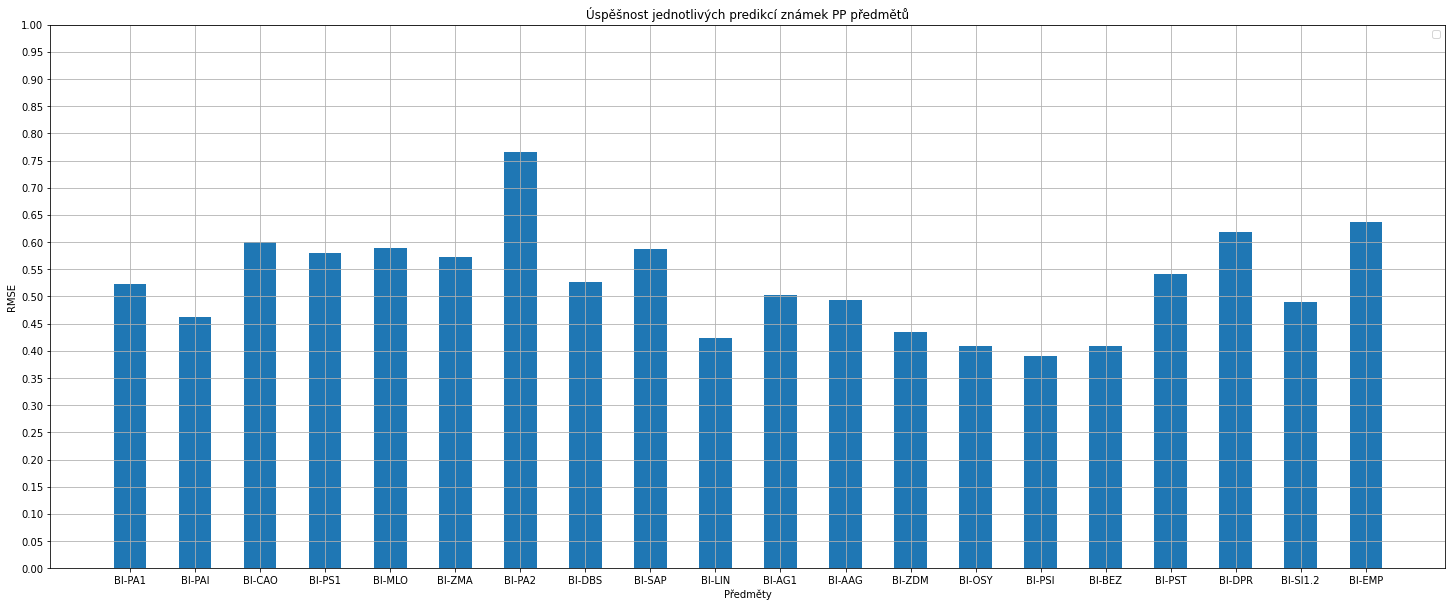

In [122]:
y = [
    test_pa1_err,
    test_pai_err,
    test_cao_err,
    test_ps1_err,
    test_mlo_err,
    test_zma_err,
    test_pa2_err,
    test_dbs_err,
    test_sap_err,
    test_lin_err,
    test_ag1_err,
    test_aag_err,
    test_zdm_err,
    test_osy_err,
    test_psi_err,
    test_bez_err,
    test_pst_err,
    test_dpr_err,
    test_si1_err,
    test_emp_err
]

x = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA', 'BI-PA2',
       'BI-DBS', 'BI-SAP', 'BI-LIN', 'BI-AG1', 'BI-AAG', 'BI-ZDM', 'BI-OSY',
       'BI-PSI', 'BI-BEZ', 'BI-PST', 'BI-DPR', 'BI-SI1.2', 'BI-EMP']
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , y, width)

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('RMSE')
ax.set_xlabel('Předměty')
ax.set_title('Úspěšnost jednotlivých predikcí známek PP předmětů')
ax.set_xticks(x)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()